<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/RF_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import packages
import numpy as np
import matplotlib.pyplot as plt
import gc
import os
import glob
import random

In [ ]:
bl = 32
l= 9
lx, ly, lz = l,l,l
pixel = 2**9
z_pixel = pixel
g_sigma = 7
k_power = 3

In [ ]:
#instance_id_list = [23898, 32860, 35693, 40640, 43753, 62221]
#gpu_id_list = [0,1,0,0,1,3]
#k_power = 3

#instance_id_list = [32049,  34872,  38017, 56228, 63073, 134404]
#gpu_id_list = [2,0,2,1,3,3]
#k_power = 2

#instance_id_list = [16825, 30829, 54107, 98328, 112172]
#gpu_id_list = [3, 3, 3, 3, 0]
#k_power = 1

#instance_id_list = [4366, 42923, 66511, 94580]
#gpu_id_list = [1,1,3,1]
#k_power = 0

#instance_id , gpu_id = 63073, 3


from google.colab import drive
drive.mount('/content/gdrive/')
folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/k_{k_power}_l_{bl}_s_{g_sigma}'
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd())

# Initialize an instance of RFSIM
npy_files = glob.glob('*.npy')


# Set the random seed
random.seed(42)

# Choose a random item from the list
exprf_npy = random.choice(npy_files)


exprf = np.load(exprf_npy)
print(exprf.shape)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
Current Working Directory: /content/gdrive/MyDrive/2023 RFSimulations/simulated_results/k_3_l_32_s_7
(65, 65, 65)


Current Working Directory: /content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/k_3


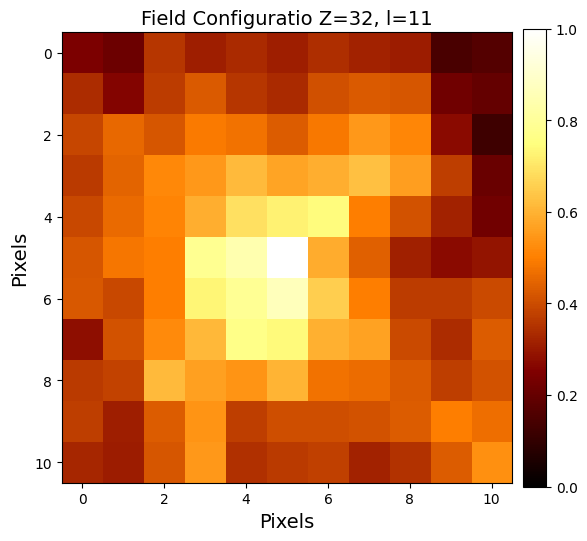

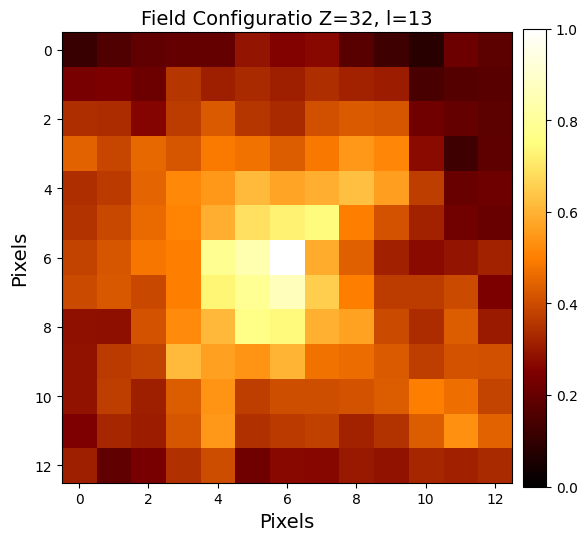

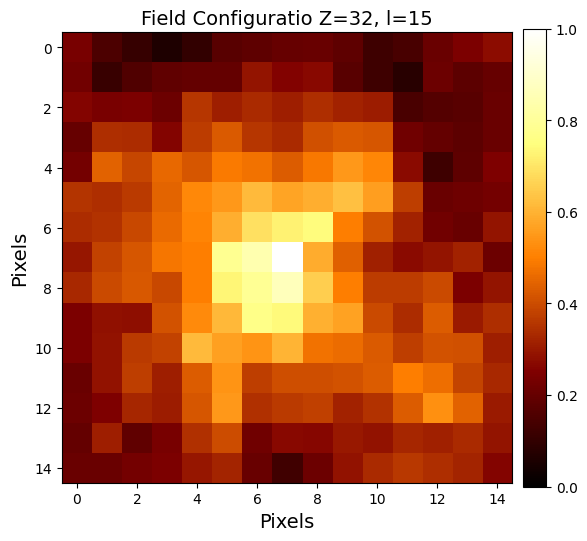

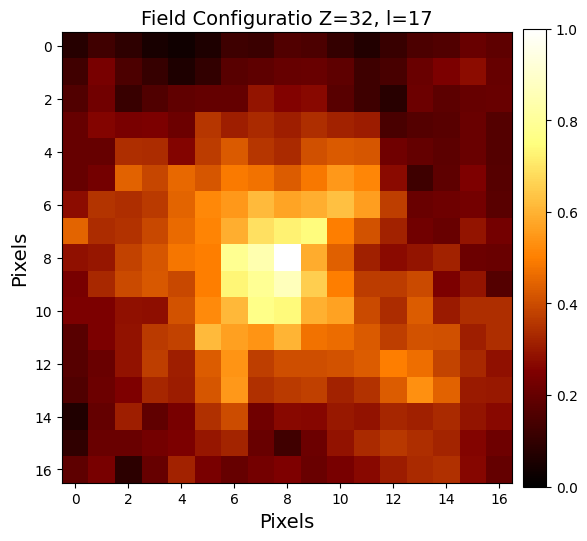

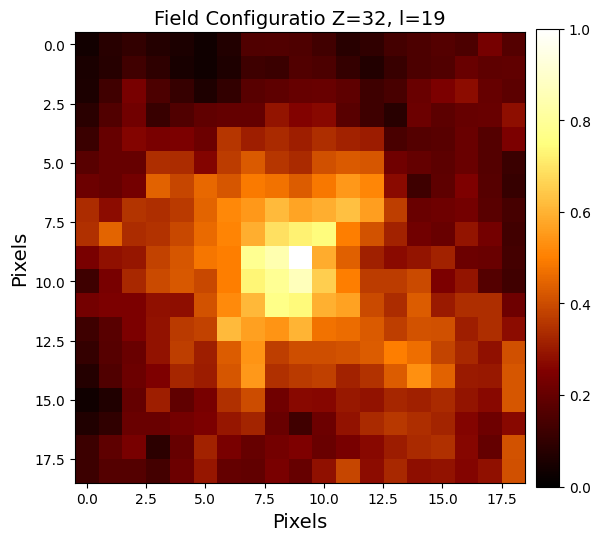

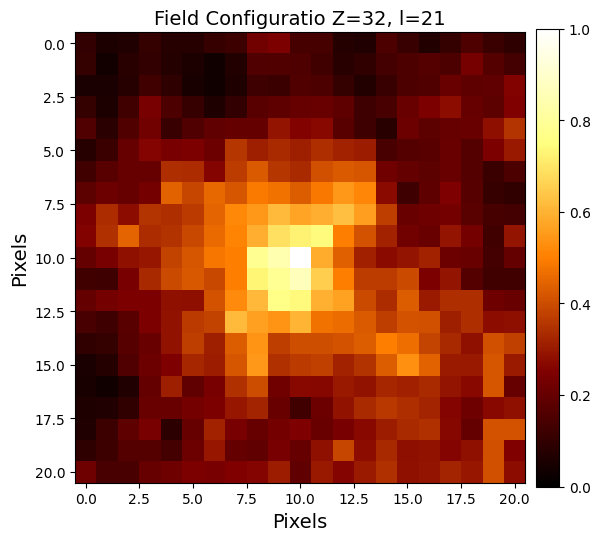

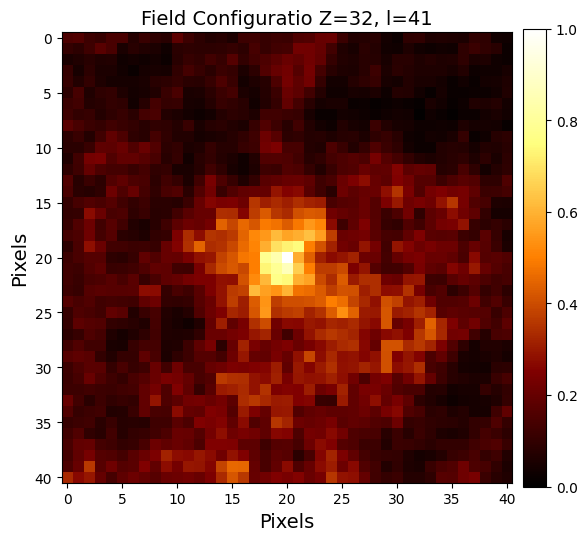

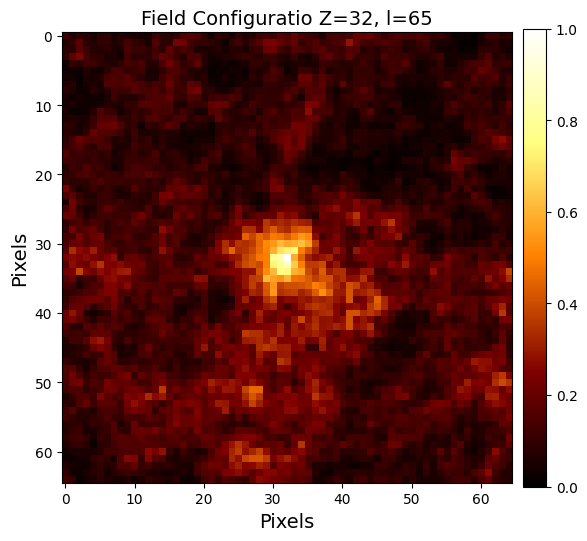

In [ ]:
max_pt = np.argmax( exprf )
max_coord = np.unravel_index(max_pt, exprf.shape)

x,y,z = max_coord[0], max_coord[1], max_coord[2]


#for z_pos in np.linspace(-l,l,2*l+1):
#max_sub_vol_slice = exprf[:, :, max_coord[2]]
# Normalize the field values

#for z_pos in np.linspace(-l,l,2*l+1):

folder_path = f'/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/visualizations/k_{k_power}'
os.chdir(folder_path)
print("Current Working Directory:", os.getcwd())


for l in [5,6,7,8,9,10,20,32]:
    lx,ly,ly=l,l,l
    z_pos= 0


    x_min, x_max = max(x-lx,0), min(x+lx +1, pixel)
    y_min, y_max = max(y-ly,0), min(y+ly +1, pixel)
    z_min, z_max = max(z-lz,0), min(z+lz +1, z_pixel)


    max_sub_vol_slice = exprf[x_min:x_max, y_min:y_max, max_coord[2]+ int(z_pos) ]
    max_sub_vol_slice = max_sub_vol_slice/(np.max(exprf))


    plt.figure(figsize=(7, 7))
    plt.imshow(max_sub_vol_slice, cmap='afmhot', clim=[0, 1])
    #BrBG bwr rainbow

    cbar = plt.colorbar(shrink=0.85, aspect=20, pad=0.02)
    plt.xlabel('Pixels', fontsize = 14)
    plt.ylabel('Pixels', fontsize = 14)
    plt.title(f'Field Configuratio Z={z+ int(z_pos)}, l={2*l+1}',  fontsize = 14)
    plt.savefig(f'Field_Conf_Z={z+ int(z_pos)}_k_{k_power}_s_{g_sigma}_l_{l}', bbox_inches='tight', pad_inches=0)
    plt.show()

In [ ]:
np.arange(5,11)

array([5, 6, 7, 8, 9])